# Final Statistic Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import numpy as np
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
display(boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [19]:
boston_df.loc[boston_df['CHAS']=='Yes']

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
142,142,3.32105,0.0,19.58,Yes,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,26.82,13.4,70 years and older
152,152,1.12658,0.0,19.58,Yes,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,12.12,15.3,70 years and older
154,154,1.41385,0.0,19.58,Yes,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,15.12,17.0,70 years and older
155,155,3.53501,0.0,19.58,Yes,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,15.02,15.6,70 years and older
160,160,1.27346,0.0,19.58,Yes,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,5.50,27.0,70 years and older
162,162,1.83377,0.0,19.58,Yes,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0,70 years and older
163,163,1.51902,0.0,19.58,Yes,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,3.32,50.0,70 years and older
208,208,0.13587,0.0,10.59,Yes,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,14.66,24.4,between 35 and 70 years
209,209,0.43571,0.0,10.59,Yes,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,23.09,20.0,70 years and older
210,210,0.17446,0.0,10.59,Yes,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,17.27,21.7,70 years and older


In [20]:
boston_df.loc[boston_df['CHAS']=='No']

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,No,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,No,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,No,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,No,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,No,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,No,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,No,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,No,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,No,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [34]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    object 
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_group   506 non-null    int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 59.4+ KB


## 1. For the "Median value of owner-occupied homes" provide a boxplot

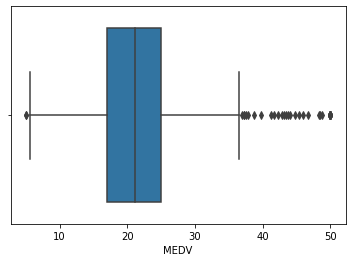

In [22]:
ax = sns.boxplot(x="MEDV", data=boston_df)

## 2. Provide a  bar plot for the Charles river variable

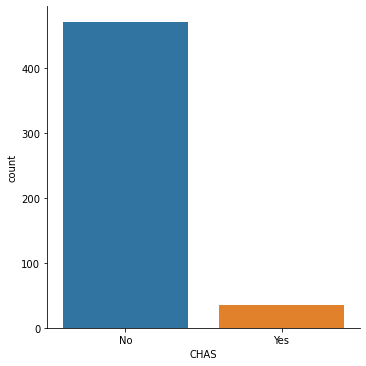

In [23]:
sns.catplot(x='CHAS', kind='count', data=boston_df)

## 3.Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

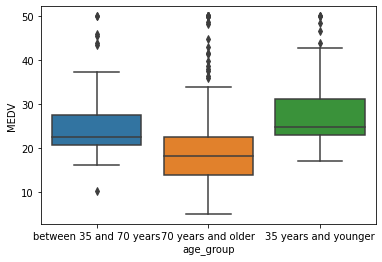

In [10]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

## 4.Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

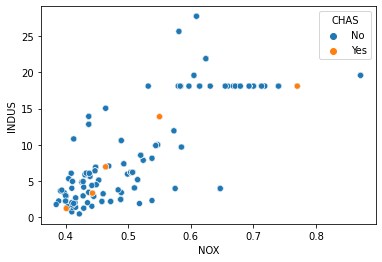

In [25]:
ax = sns.scatterplot(x='NOX', y='INDUS', hue='CHAS',
                     data=boston_df)

## 5.Create a histogram for the pupil to teacher ratio variable



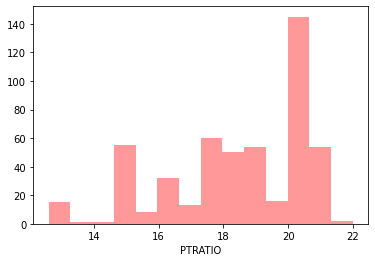

In [36]:
ax = sns.distplot(boston_df['PTRATIO'],color= 'red', kde = False)


(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

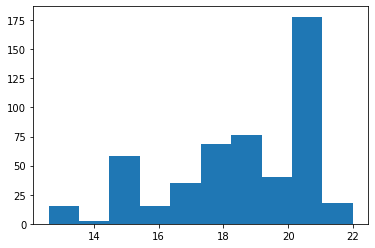

In [27]:
plt.hist(boston_df['PTRATIO'])

## 6.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# State the hypothesis

## Null Hypothesis H_0:
###  Difference between Median value of houses bounded by the Charles river and Median Value Of hourse Not Bounded by Charles river <u> is Significant
## Alternate Hypothesis H_1:
### Difference between Median value of houses bounded by the Charles river and Median Value Of hourse Not Bounded by Charles river is <u>Not Significant

In [28]:

boston_df = boston_df.astype({"CHAS": object})
boston_df['CHAS'] = boston_df['CHAS'].replace([1],'Yes')
boston_df['CHAS'] = boston_df['CHAS'].replace([0],'No')
boston_df

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] =='Yes']['MEDV'],
                   boston_df[boston_df['CHAS'] == 'No']['MEDV'], equal_var = True)

# since the p-value is less than 0.05 we reject the Null Hypothesis


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Conclusion: Difference between Median value of houses bounded by the Charles river and Median Value Of hourse Not Bounded by Charles river is Significant

## 7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# State the hypothesis

## 𝐻_0:µ_1=µ_2=µ_3  (the three population means are equal)
## 𝐻_1:  At least one of the means differ

In [33]:
boston_df = boston_df.astype({"MEDV": float})
#boston_df = boston_df.astype({"age_group": float})
boston_df["age_group"] = boston_df["age_group"].replace(['35 years and younger'],1)
boston_df["age_group"] = boston_df["age_group"].replace(['between 35 and 70 years'],2)
boston_df["age_group"] = boston_df["age_group"].replace(['70 years and older'],3)


In [37]:
Thirtyfive_and_Lower = boston_df[boston_df["age_group"] == 1]['MEDV']
Thirtyfive_and_seventy = boston_df[boston_df["age_group"] == 2]['MEDV']
Seventy_and_older = boston_df[boston_df["age_group"] == 3]['MEDV']

In [38]:
f_statistic, p_value = scipy.stats.f_oneway(Thirtyfive_and_Lower, Thirtyfive_and_seventy, Seventy_and_older )
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## Conclusion : Since p value is less than 0.05 we <span style= "color:red" > <u>**reject**<u> </span> the Null Hypothesis. 

# 8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# State Hypothesis

## Null Hypothesis H-0:
### There is a correlation between Nitric Oxide concentration and a proportion of non-retail business acres per town
## Alternate Hypothesis H_1:
### There is  <u> NO correlation between Nitric Oxide concentration and a proportion of non-retail business acres per town

In [30]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209162, 7.913361061229697e-98)

## Conclusion: Since the p value is less than 0.05 we <span style ="color:red"> <u>**reject** <u></span>the Null Hypothesis

# 9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# State Hypothesis

## Null Hypothesis H-0:
### There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
## Alternate Hypothesis H_1:
### There is <span style= "color:red">NO </span> impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [31]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.21e-08
Time:                        10:09:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion :Since p value is less than 0.05 we <span style="color:red">reject </span>the Null Hypotheis